In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd

def sinusoid(freq = 440.0, dur = 1.0, srate = 44100, amp = 1, phase = 0):
    t = np.linspace(0, dur, int(srate*dur))
    data = amp*np.sin(2*np.pi*t*freq + phase)
    return data

In [2]:
#Estimation by finding the maximum value of the signal
def peak_amplitude(data):
    return np.max(data)

In [15]:
#Estimation by finding the RMS value of the amplitude
def rms_amplitude(data):
    rms_sum = np.sum(np.multiply(data,data))
    rms_sum /= len(data)
    return np.multiply(np.sqrt(2), np.sqrt(rms_sum))

In [16]:
#Estimation by calculating the dot product. This method is robust when there is any interefering noise present in the signal
def dot_amplitude(data1, data2):
    dot_prod = np.dot(data1, data2)
    return np.multiply(2, dot_prod) / len(data)

Dot Product Amplitude :  3.9998185941043105


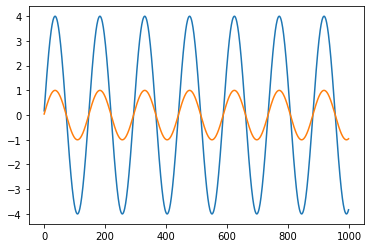

In [17]:
data = sinusoid(300, 0.5, amp=4)
basis = sinusoid(300, 0.5, amp=1)
print("Dot Product Amplitude : ", dot_amplitude(data,basis))
plt.figure()
plt.plot(data[1:1000])
plt.plot(basis[1:1000])

Dot Product Amplitude : 3.99
Peak Amplitude : 7.68
RMS Amplitude : 4.24


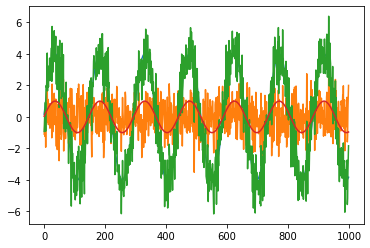

In [22]:
noise = np.random.normal(0, 1.0, len(data))
mix = data + noise
plt.figure()
plt.plot(data[1:1000])
plt.plot(noise[1:1000])
plt.plot(mix[1:1000])
plt.plot(basis[1:1000])
print("Dot Product Amplitude : %2.2f" % dot_amplitude(mix, basis))
print("Peak Amplitude : %2.2f" % peak_amplitude(mix))
print("RMS Amplitude : %2.2f" % rms_amplitude(mix))


Original Amplitude : 3.00
Original Phase : 0.79
Estimated Amplitude : 3.00
Estimated Phase : 0.79


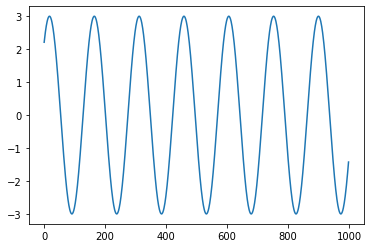

In [26]:
#Amplitude and Phase Estimation (Much Easier Way using basis functions of the Discrete Fourier Transform)
srate = 8000
amplitude = 3.0
k = 1000
phase = k*2*np.pi/srate
print("Original Amplitude : %2.2f" %amplitude)
print("Original Phase : %2.2f" %phase)

data = sinusoid(300, 0.5, amp = amplitude, phase = phase)
plt.plot(data[1:1000])
basis_sin = sinusoid(300, 0.5, amp = 1, phase = 0)
basis_cos = sinusoid(300, 0.5, amp = 1, phase = np.pi/2)

a = dot_amplitude(data, basis_sin)
b = dot_amplitude(data, basis_cos)
est_amp = np.sqrt(a*a + b*b)
est_phase = np.arctan(b/a)

print("Estimated Amplitude : %2.2f" %est_amp)
print("Estimated Phase : %2.2f" %est_phase)